# Using Predictive Analysis To Predict Diagnosis of a Breast Tumor
Identify the problem
Breast cancer is the most common malignancy among women, accounting for nearly 1 in 3 cancers diagnosed among women in the United States, and it is the second leading cause of cancer death among women. Breast Cancer occurs as a results of abnormal growth of cells in the breast tissue, commonly referred to as a Tumor. A tumor does not mean cancer - tumors can be benign (not cancerous), pre-malignant (pre-cancerous), or malignant (cancerous). Tests such as MRI, mammogram, ultrasound and biopsy are commonly used to diagnose breast cancer performed.

Expected outcome
Given breast cancer results from breast fine needle aspiration (FNA) test (is a quick and simple procedure to perform, which removes some fluid or cells from a breast lesion or cyst (a lump, sore or swelling) with a fine needle similar to a blood sample needle). Since this build a model that can classify a breast cancer tumor using two training classification:

1= Malignant (Cancerous) - Present
0= Benign (Not Cancerous) -Absent
Objective
Since the labels in the data are discrete, the predication falls into two categories, (i.e. Malignant or benign). In machine learning this is a classification problem.

Thus, the goal is to classify whether the breast cancer is benign or malignant and predict the recurrence and non-recurrence of malignant cases after a certain period. To achieve this we have used machine learning classification methods to fit a function that can predict the discrete class of new input.

Identify data sources
The Breast Cancer datasets is available machine learning repository maintained by the University of California, Irvine. The dataset contains 569 samples of malignant and benign tumor cells.

The columns contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.

In [1]:
#loading labraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image, display

In [2]:
#loading dataset
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

# Converting the given data to a DataFrame using option in Pandas DataFrame function

In [4]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns=np.append(cancer['feature_names'], ['target']))

# Inspecting the data
The first step is to visually inspect the new data set. There are multiple ways to achieve this:

The easiest being to request the first few records using the DataFrame data.head()* method. By default, “data.head()” returns the first 5 rows from the DataFrame object df (excluding the header row).
Alternatively, one can also use “df.tail()” to return the five rows of the data frame.
For both head and tail methods, there is an option to specify the number of records by including the required number in between the parentheses when calling either method.Inspecting the data

In [5]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [6]:
df_cancer.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [7]:
df_cancer.shape

(569, 31)

In [8]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
df_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


# Data Visualizations
Visualization is the process of projecting the data, or parts of it, into Cartesian space or into abstract images. In the data mining process, data exploration is leveraged in many different steps including preprocessing, modeling, and interpretation of results.

Correlation matrix
Scatter plots

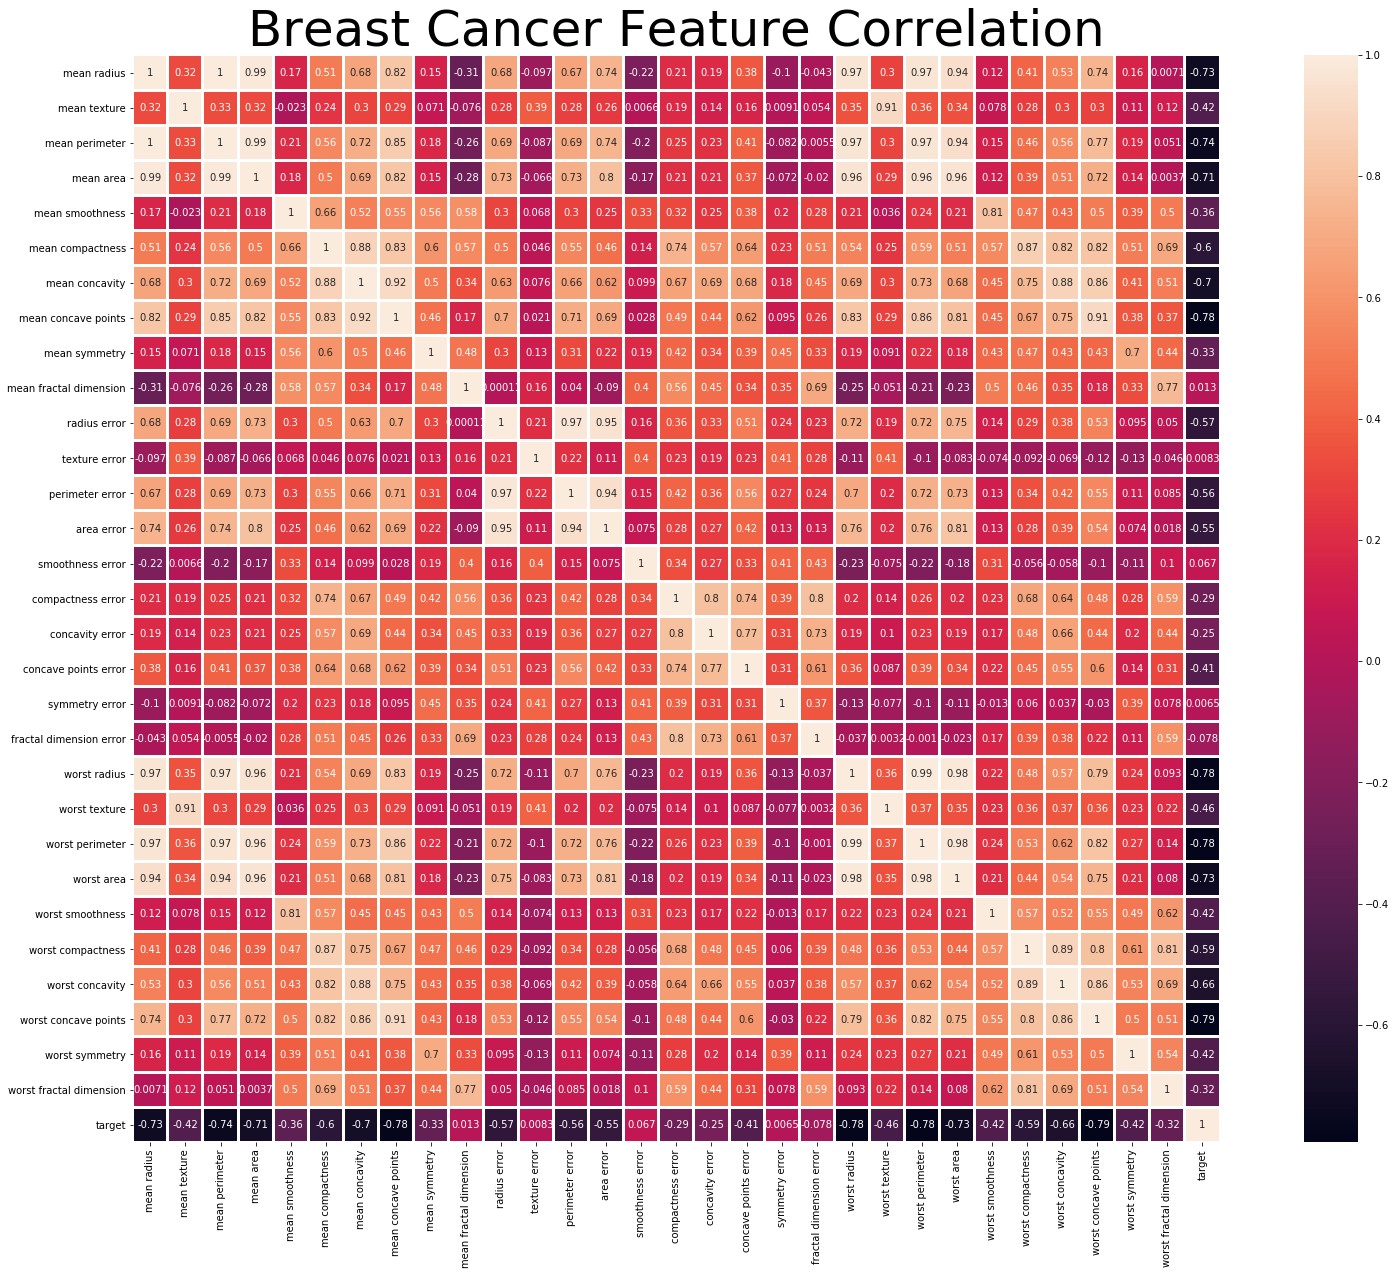

In [10]:
plt.figure(figsize=(30, 20))
plt.title('Breast Cancer Feature Correlation', fontsize=50, ha='center')
sns.heatmap(df_cancer.corr(), annot=True, square='square', fmt='.2g',linewidths=2)

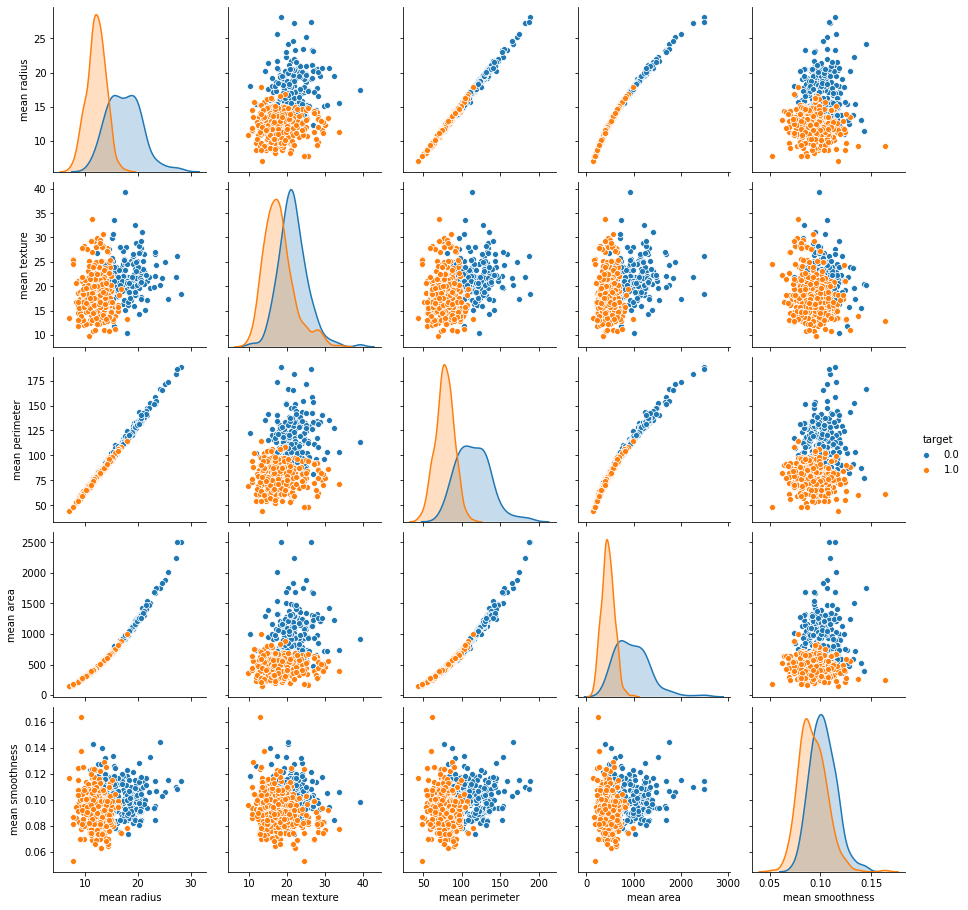

In [11]:
sns.pairplot(df_cancer, hue='target', vars=[cancer.feature_names[0], cancer.feature_names[1], cancer.feature_names[2], cancer.feature_names[3], cancer.feature_names[4]])

# Pre-Processing the data
Introduction
Data preprocessing is a crucial step for any data analysis problem. It is often a very good idea to prepare your data in such way to best expose the structure of the problem to the machine learning algorithms that you intend to use.This involves a number of activities such as:

Assigning numerical values to categorical data;
Handling missing values; and
Normalizing the features (so that features on small scales do not dominate when fitting a model to the data).
Assesing Model Accuracy: Split data into training and test sets
The simplest method to evaluate the performance of a machine learning algorithm is to use different training and testing datasets. Here I will Split the available data into a training set and a testing set. (70% training, 30% test)

In [12]:
X = cancer.data
Y = cancer.target
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((426, 30), (426,), (143, 30), (143,))

# Feature Standardization

In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Predictive model using Support Vector Machine (SVM)
Support vector machines (SVMs) learning algorithm will be used to build the predictive model. SVMs are one of the most popular classification algorithms, and have an elegant way of transforming nonlinear data so that one can use a linear algorithm to fit a linear model to the data (Cortes and Vapnik 1995)

Kernelized support vector machines are powerful models and perform well on a variety of datasets.

SVMs allow for complex decision boundaries, even if the data has only a few features.
They work well on low-dimensional and high-dimensional data (i.e., few and many features), but don’t scale very well with the number of samples.

Running an SVM on data with up to 10,000 samples might work well, but working with datasets of size 100,000 or more can become challenging in terms of runtime and memory usage.

SVMs requires careful preprocessing of the data and tuning of the parameters. This is why, these days, most people instead use tree-based models such as random forests or gradient boosting (which require little or no preprocessing) in many applications.

SVM models are hard to inspect; it can be difficult to understand why a particular prediction was made, and it might be tricky to explain the model to a nonexpert.

Important Parameters
The important parameters in kernel SVMs are the

Regularization parameter C,
The choice of the kernel,(linear, radial basis function(RBF) or polynomial)
Kernel-specific parameters.
gamma and C both control the complexity of the model, with large values in either resulting in a more complex model. Therefore, good settings for the two parameters are usually strongly correlated, and C and gamma should be adjusted together.

In [14]:
svc = SVC()
svc.fit(x_train, y_train)

classifier_score = svc.score(x_test, y_test)
print('\nThe classifier accuracy score is', classifier_score)


The classifier accuracy score is 0.972027972027972


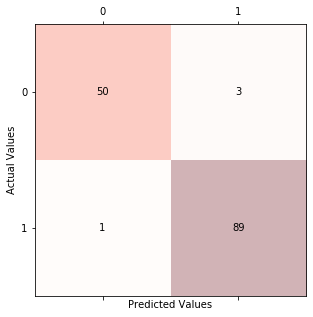

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        53
           1       0.97      0.99      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [15]:
y_pred = svc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, y_pred ))

#
Observation
There are two possible predicted classes: "1" and "0". Malignant = 1 (indicates prescence of cancer cells) and Benign = 0 (indicates abscence).

The classifier made a total of 143 predictions (i.e 143 patients were being tested for the presence breast cancer).
Out of those 174 cases, the classifier predicted "yes" 97 times, and "no" 46 times.
In reality, 90 patients in the sample have the disease, and 53 patients do not.

# Optimizing the SVM Classifier
Machine learning models are parameterized so that their behavior can be tuned for a given problem. Models can have many parameters and finding the best combination of parameters can be treated as a search problem. In this notebook, I aim to tune parameters of the SVM Classification model using scikit-learn.

In [16]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.001], 'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose = 4)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.895, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.965, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.941, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.953, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.976, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.884, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.930, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.976, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.941, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.965, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.976, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [17]:
print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 1, 'gamma': 1, 'kernel': 'rbf'} with a score of 0.98


In [18]:
grid_score = grid.score(x_test, y_test)
print('\nThe grid accuracy score is', grid_score)


The grid accuracy score is 0.972027972027972


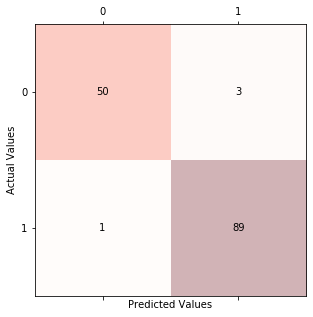

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        53
           1       0.97      0.99      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [19]:
grid_pred = grid.predict(x_test)
cm = confusion_matrix(y_test, grid_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, grid_pred ))

## Observation
There are two possible predicted classes: "1" and "0". Malignant = 1 (indicates prescence of cancer cells) and Benign = 0 (indicates abscence).

The classifier made a total of 143 predictions (i.e 143 patients were being tested for the presence breast cancer).
Out of those 174 cases, the classifier predicted "yes" 92 times, and "no" 51 times.
In reality, 90 patients in the sample have the disease, and 53 patients do not.
Final Accuracy reached - 97%